#Pacotes

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from scipy import stats
from statsmodels.iolib.summary2 import summary_col
import plotly.graph_objs as go
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

## Iniciando tratamento dos dados

In [ ]:
# definindo os dados dos anos anteriores a 2022 como base para treino do modelo
treino = pd.read_csv("air_system_previous_years.csv", delimiter = ",")

In [ ]:
treino.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,703300,755876,0,5374,2108,4114,12348,615248,5526276,2378,4,0,0,2328746,1022304,415432,287230,310246,681504,1118814,3574,0,0,6700214,0,10,108,50,2551696,97518,947550,799478,330760,353400,299160,305200,283680,na,na,na,178540,76698.08,6700214,6700214,6599892,43566,68656,54064,638360,6167850,1209600,246244,2,96,0,5245752,0,916567.68,6,1924,0,0,0,118196,1309472,3247182,1381362,98822,11208,1608,220,240,6700214,na,10476,1226,267998,521832,428776,4015854,895240,26330,118,0,532,734,4122704,51288,0,532572,0,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,1996924,99560,0,7336,7808,13776,13086,1010074,1873902,14726,6,0,0,1378576,447166,199512,154298,137280,138668,165908,229652,87082,4708,3646660,86,454,364,350,1393352,49028,688314,392208,341420,359780,366560,na,na,na,na,na,6700,33057.51,3646660,3646660,3582034,17733.0,260120,115626,6900,2942850,1209600,0,na,na,na,2291079.36,0,643536.96,0,0,0,0,38,98644,1179502,1286736,336388,36294,5192,56,na,0,3646660,na,6160,796,164860,350066,272956,1837600,301242,9148,22,0,na,na,na,na,na,na,na,na,na,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,239798,1450312,0,1620,1156,1228,34250,1811606,710672,34,0,0,0,790690,672026,332340,254892,189596,135758,103552,81666,46,0,2673338,128,202,576,4,1234132,28804,160176,139730,137160,130640,na,na,na,na,na,na,28000,41040.08,2673338,2673338,2678534,15439.0,7466,22436,248240,2560566,1209600,63328,0,124,0,2322692.16,0,236099.52,0,0,0,0,0,33276,1215280,1102798,196502,10260,2422,28,0,6,2673338,na,3584,500,56362,149726,100326,1744838,488302,16682,246,0,230,292,2180528,29188,22,20346,0,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,0,2038,5596,0,64,6,6,914,76,2478,2398,1692,0,0,6176,340,304,102,74,406,216,16,0,0,21614,2,12,0,0,2668,184,7632,3090,na,na,na,na,na,na,na,na,10580,12.69,21614,21614,21772,32,50,1994,21400,7710,120960

In [ ]:
treino.dtypes.value_counts()

object    170
int64       1
Name: count, dtype: int64

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
treino.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,703300,755876,0,5374,2108,4114,12348,615248,5526276,2378,4,0,0,2328746,1022304,415432,287230,310246,681504,1118814,3574,0,0,6700214,0,10,108,50,2551696,97518,947550,799478,330760,353400,299160,305200,283680,na,na,na,178540,76698.08,6700214,6700214,6599892,43566,68656,54064,638360,6167850,1209600,246244,2,96,0,5245752,0,916567.68,6,1924,0,0,0,118196,1309472,3247182,1381362,98822,11208,1608,220,240,6700214,na,10476,1226,267998,521832,428776,4015854,895240,26330,118,0,532,734,4122704,51288,0,532572,0,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,1996924,99560,0,7336,7808,13776,13086,1010074,1873902,14726,6,0,0,1378576,447166,199512,154298,137280,138668,165908,229652,87082,4708,3646660,86,454,364,350,1393352,49028,688314,392208,341420,359780,366560,na,na,na,na,na,6700,33057.51,3646660,3646660,3582034,17733.0,260120,115626,6900,2942850,1209600,0,na,na,na,2291079.36,0,643536.96,0,0,0,0,38,98644,1179502,1286736,336388,36294,5192,56,na,0,3646660,na,6160,796,164860,350066,272956,1837600,301242,9148,22,0,na,na,na,na,na,na,na,na,na,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,239798,1450312,0,1620,1156,1228,34250,1811606,710672,34,0,0,0,790690,672026,332340,254892,189596,135758,103552,81666,46,0,2673338,128,202,576,4,1234132,28804,160176,139730,137160,130640,na,na,na,na,na,na,28000,41040.08,2673338,2673338,2678534,15439.0,7466,22436,248240,2560566,1209600,63328,0,124,0,2322692.16,0,236099.52,0,0,0,0,0,33276,1215280,1102798,196502,10260,2422,28,0,6,2673338,na,3584,500,56362,149726,100326,1744838,488302,16682,246,0,230,292,2180528,29188,22,20346,0,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,0,2038,5596,0,64,6,6,914,76,2478,2398,1692,0,0,6176,340,304,102,74,406,216,16,0,0,21614,2,12,0,0,2668,184,7632,3090,na,na,na,na,na,na,na,na,10580,12.69,21614,21614,21772,32,50,1994,21400,7710,120960

In [ ]:
# Foi observado que as variáveis estão com o tipo object quando na verdade são do tipo Float
df = treino.iloc[:, 1:170].replace('na',np.nan).astype(float)

In [ ]:
# transformando variável class em categorica
df.insert(0, "class", treino["class"].astype("category"))

In [ ]:
df.head()

,classe,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,classe_label,phat
0,neg,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,703300.0,755876.0,0.0,5374.0,2108.0,4114.0,12348.0,615248.0,5526276.0,2378.0,4.0,0.0,0.0,2328746.0,1022304.0,415432.0,287230.0,310246.0,681504.0,1118814.0,3574.0,0.0,0.0,6700214.0,0.0,10.0,108.0,50.0,2551696.0,97518.0,947550.0,799478.0,330760.000000,353400.000000,299160.000000,305200.000000,283680.000000,551389.799347,582871.32293,604886.613264,178540.0,76698.08,6700214.0,6700214.0,6599892.0,43566.0,68656.0,54064.0,638360.0,6167850.0,1209600.0,246244.0,2.000000,96.000000,0.000000,5245752.00,0.0,916567.68,6.0,1924.0,0.0,0.0,0.0,118196.0,1309472.0,3247182.0,1381362.0,98822.0,11208.0,1608.0,220.000000,240.0,6700214.0,37.06298,10476.0,1226.0,267998.0,521832.0,428776.0,4015854.0,895240.0,26330.0,118.0,0.0,532.000000,734.000000,4.122704e+06,51288.000000,0.000000,532572.000000,0.000000,18.000000,5.330690e+06,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,1.0,0.996029
1,neg,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,1996924.0,99560.0,0.0,7336.0,7808.0,13776.0,13086.0,1010074.0,1873902.0,14726.0,6.0,0.0,0.0,1378576.0,447166.0,199512.0,154298.0,137280.0,138668.0,165908.0,229652.0,87082.0,4708.0,3646660.0,86.0,454.0,364.0,350.0,1393352.0,49028.0,688314.0,392208.0,341420.000000,359780.000000,366560.000000,463710.833594,513147.820297,551389.799347,582871.32293,604886.613264,6700.0,33057.51,3646660.0,3646660.0,3582034.0,17733.0,260120.0,115626.0,6900.0,2942850.0,1209600.0,0.0,190221.810984,91.520415,0.000443,2291079.36,0.0,643536.96,0.0,0.0,0.0,0.0,38.0,98644.0,1179502.0,1286736.0,336388.0,36294.0,5192.0,56.0,190515.566938,0.0,3646660.0,37.06298,6160.0,796.0,164860.0,350066.0,272956.0,1837600.0,301242.0,9148.0,22.0,0.0,749.091271,1222.960989,1.928825e+06,351510.236231,274.179338,19374.290483,7.393791,13.416652,2.200752e+06,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,1.0,0.994854
2,neg,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,

In [ ]:
df.rename(columns={'class': 'classe'}, inplace = True)

In [ ]:
df["classe"].value_counts()

classe
neg    59000
pos     1000
Name: count, dtype: int64

# Tratando missing values com a média da coluna

---



In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy= "mean")

In [ ]:
for col in df.iloc[:, 1:170]:
    imputer.fit(df[[col]])
    df[col] = imputer.transform(df[[col]])

In [ ]:
df.isnull().sum()

classe    0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_006    0
ee_007    0
ee_008    0
ee_009    0
ef_000    0
Length: 170, dtype: int64

# Rodando o modelo



In [ ]:
formula = "classe_label ~ " + " + ".join(df.columns[1:170])
formula

'classe_label ~ aa_000 + ab_000 + ac_000 + ad_000 + ae_000 + af_000 + ag_000 + ag_001 + ag_002 + ag_003 + ag_004 + ag_005 + ag_006 + ag_007 + ag_008 + ag_009 + ah_000 + ai_000 + aj_000 + ak_000 + al_000 + am_0 + an_000 + ao_000 + ap_000 + aq_000 + ar_000 + as_000 + at_000 + au_000 + av_000 + ax_000 + ay_000 + ay_001 + ay_002 + ay_003 + ay_004 + ay_005 + ay_006 + ay_007 + ay_008 + ay_009 + az_000 + az_001 + az_002 + az_003 + az_004 + az_005 + az_006 + az_007 + az_008 + az_009 + ba_000 + ba_001 + ba_002 + ba_003 + ba_004 + ba_005 + ba_006 + ba_007 + ba_008 + ba_009 + bb_000 + bc_000 + bd_000 + be_000 + bf_000 + bg_000 + bh_000 + bi_000 + bj_000 + bk_000 + bl_000 + bm_000 + bn_000 + bo_000 + bp_000 + bq_000 + br_000 + bs_000 + bt_000 + bu_000 + bv_000 + bx_000 + by_000 + bz_000 + ca_000 + cb_000 + cc_000 + cd_000 + ce_000 + cf_000 + cg_000 + ch_000 + ci_000 + cj_000 + ck_000 + cl_000 + cm_000 + cn_000 + cn_001 + cn_002 + cn_003 + cn_004 + cn_005 + cn_006 + cn_007 + cn_008 + cn_009 + co_00

In [ ]:
# Criando uma label para a variável target para facilitar visualização dos resultados
# neg = 1 e pos = 0
df.loc[df['classe']== "neg",
       'classe_label'] = 1
df.loc[df['classe']== "pos",
       'classe_label'] = 0

In [ ]:
# Estimação de um modelo logístico binário
modelo = smf.glm(formula=formula, data=df,
                         family=sm.families.Binomial()).fit()

In [ ]:
# Parâmetros do modelo
modelo.summary()

# Construção de uma matriz de confusão


In [ ]:
# Adicionando os valores previstos de probabilidade na base de dados
df['phat'] = modelo.predict()
df.head()

,classe,aa_000,ab_000,ac_000,ad_000,...,ee_008,ee_009,ef_000,classe_label,phat
0,neg,76698.0,0.713189,2.130706e+09,280.000000,...,73224.0,0.0,0.0,1.0,0.996029
1,neg,33058.0,0.713189,0.000000e+00,190620.639314,...,97576.0,1500.0,0.0,1.0,0.994854
2,neg,41040.0,0.713189,2.280000e+02,100.000000,...,95128.0,514.0,0.0,1.0,0.999183
3,neg,12.0,0.000000,7.000000e+01,66.000000,...,0.0,0.0,4.0,1.0,0.998776
4,neg,60874.0,0.713189,1.368000e+03,458.000000,...,433954.0,1218.0,0.0,1.0,0.994308


In [ ]:
# Construção de função para a definição da matriz de confusão

from sklearn.metrics import confusion_matrix, accuracy_score,\
    ConfusionMatrixDisplay, recall_score

def matriz_confusao(observado,predicts,cutoff):

    values = predicts.values

    predicao_binaria = []

    for item in values:
        if item >= cutoff:
            predicao_binaria.append(1)
        else:
            predicao_binaria.append(0)

    cm = confusion_matrix(observado, predicao_binaria)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

    sensitividade = recall_score(observado, predicao_binaria, pos_label=1)
    especificidadee = recall_score(observado, predicao_binaria, pos_label=0)
    acuracia = accuracy_score(observado, predicao_binaria)


    indicadores = pd.DataFrame({'Sensitividade':[sensitividade],
                                'Especificidade':[especificidadee],
                                'Acurácia':[acuracia]})
    return indicadores


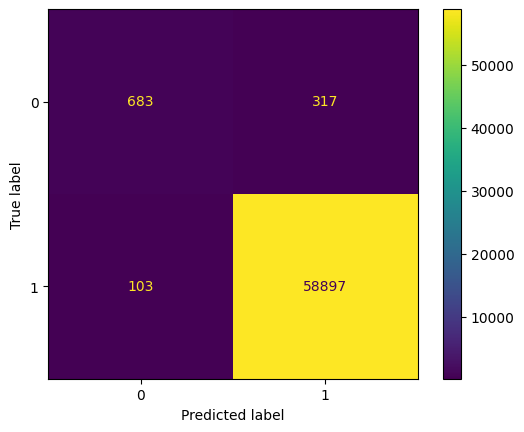

,Sensitividade,Especificidade,Acurácia
0,0.998254,0.683,0.993


In [ ]:
#Matriz de confusão para cutoff = 0.5
matriz_confusao(observado=df['classe_label'],
                predicts=df['phat'],
                cutoff=0.5)
# Aqui conseguimos observar uma acuracia de 99,3% especificidade de 68,3% e Sensitividade de 99,8%

# Construção da curva ROC


In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
fpr, tpr, thresholds =roc_curve(df['classe_label'],df['phat'])
roc_auc = auc(fpr, tpr)

In [ ]:
gini = (roc_auc - 0.5)/(0.5)

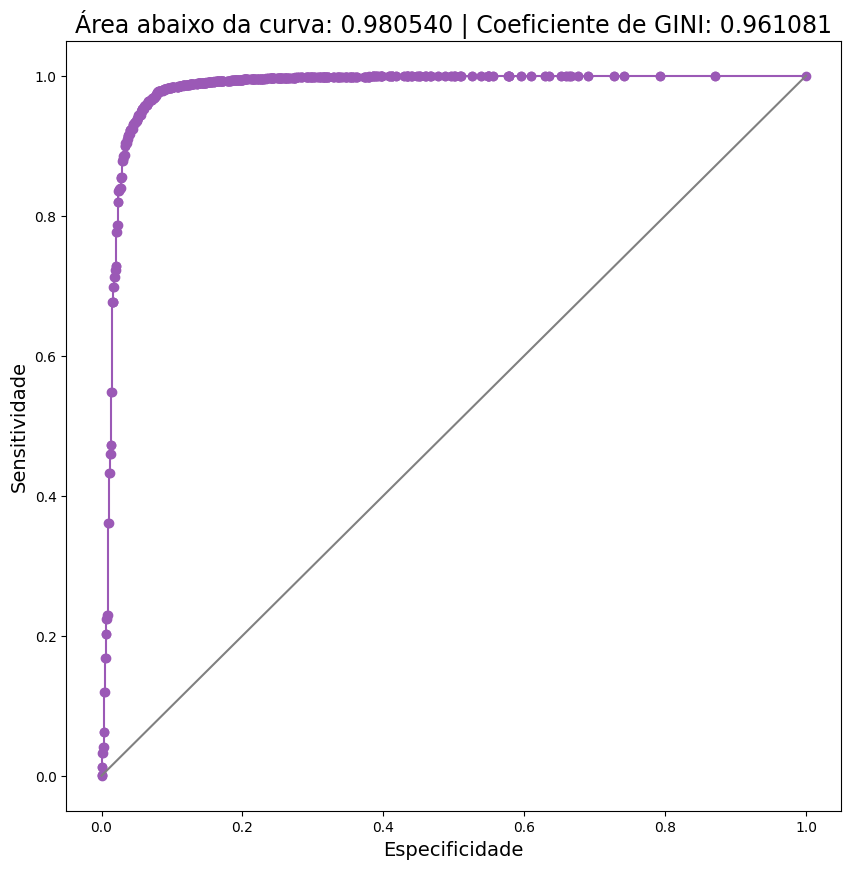

In [ ]:
#Plotando a curva ROC
plt.figure(figsize=(10,10))
plt.plot(fpr,tpr, '-o', color="#9b59b6")
plt.plot(fpr,fpr, color='gray')
plt.title("Área abaixo da curva: %f" % roc_auc +
          " | Coeficiente de GINI: %f" % gini, fontsize=17)
plt.xlabel("Especificidade", fontsize=14)
plt.ylabel("Sensitividade", fontsize=14)
plt.show()

# Área da curva roc 98,05%

# O modelo treinado apresenta bons resultados contudo vou fazer um procedimento de STEPWISE para validar se tem alguma variável que pode sair do modelo por nao ser estatisticamente significativa

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn import linear_model

In [ ]:
x = df.iloc[:, 1:170]
y = df[["classe_label"]]

In [ ]:
# stepwise buscando o melhor ajuste das variáveis
sfs = SequentialFeatureSelector(linear_model.LogisticRegression(),
                                k_features='best',
								                forward=True,
								                scoring='accuracy',
								                cv=None)
selected_features = sfs.fit(x, y)

In [ ]:
features_stepwise = selected_features.k_feature_names_

In [ ]:
# Mostrando quais foram as features selecionadas pelo stepwise
# das 169 variaveis foi selecionado 129 deixando de lado 40 que nao possui significância estatística
features_stepwise = ('aa_000',  'ab_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005',
 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'ao_000', 'ap_000', 'aq_000', 'ar_000',
 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006',
 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_002',
 'ba_003', 'ba_006', 'ba_007', 'ba_008', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bh_000', 'bj_000', 'bk_000', 'bl_000',
 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bz_000', 'ca_000', 'cb_000', 'cd_000',
 'cg_000', 'ch_000', 'cj_000', 'cl_000', 'cm_000', 'cn_000', 'cn_001', 'cn_002', 'cn_004', 'cn_007', 'cn_008',
 'cn_009', 'co_000', 'cp_000', 'cr_000', 'cs_000', 'cs_001', 'cs_002', 'cs_003', 'cs_004', 'cs_007', 'cs_008',
  'cs_009', 'ct_000', 'cu_000', 'cx_000', 'cy_000', 'cz_000', 'da_000', 'db_000', 'dc_000', 'dd_000', 'de_000', 'dg_000',
 'dh_000', 'di_000', 'dj_000', 'dk_000', 'dl_000', 'dn_000', 'do_000', 'dp_000', 'dt_000', 'dv_000', 'dx_000',
 'dy_000', 'dz_000', 'ea_000', 'ec_00', 'ed_000', 'ee_000', 'ee_001', 'ee_002', 'ee_004', 'ee_005', 'ee_007',
 'ee_008', 'ee_009', 'ef_000')

# Estimando novamente o modelo logístico binário agora somente com features que passaram no procedimento de stepwise


In [ ]:
formula = "classe_label ~ " + " + ".join(features_stepwise)
formula

'classe_label ~ aa_000 + ab_000 + ad_000 + ae_000 + af_000 + ag_000 + ag_001 + ag_002 + ag_003 + ag_004 + ag_005 + ag_007 + ag_008 + ag_009 + ah_000 + aj_000 + ak_000 + al_000 + am_0 + ao_000 + ap_000 + aq_000 + ar_000 + as_000 + at_000 + au_000 + av_000 + ax_000 + ay_000 + ay_001 + ay_002 + ay_003 + ay_004 + ay_005 + ay_006 + ay_007 + ay_008 + ay_009 + az_000 + az_003 + az_004 + az_005 + az_006 + az_007 + az_008 + az_009 + ba_002 + ba_003 + ba_006 + ba_007 + ba_008 + bc_000 + bd_000 + be_000 + bf_000 + bh_000 + bj_000 + bk_000 + bl_000 + bn_000 + bo_000 + bp_000 + bq_000 + br_000 + bs_000 + bt_000 + bz_000 + ca_000 + cb_000 + cd_000 + cg_000 + ch_000 + cj_000 + cl_000 + cm_000 + cn_000 + cn_001 + cn_002 + cn_004 + cn_007 + cn_008 + cn_009 + co_000 + cp_000 + cr_000 + cs_000 + cs_001 + cs_002 + cs_003 + cs_004 + cs_007 + cs_008 + cs_009 + ct_000 + cu_000 + cx_000 + cy_000 + cz_000 + da_000 + db_000 + dc_000 + dd_000 + de_000 + dg_000 + dh_000 + di_000 + dj_000 + dk_000 + dl_000 + dn_00

In [ ]:
modelo = smf.glm(formula= formula , data=df,
                         family=sm.families.Binomial()).fit()

In [ ]:
# Adicionando os valores previstos de probabilidade na base de dados
df['phat'] = modelo.predict()
df.head()

,classe,aa_000,ab_000,ac_000,ad_000,...,ee_008,ee_009,ef_000,classe_label,phat
0,neg,76698.0,0.713189,2.130706e+09,280.000000,...,73224.0,0.0,0.0,1.0,0.992829
1,neg,33058.0,0.713189,0.000000e+00,190620.639314,...,97576.0,1500.0,0.0,1.0,0.995633
2,neg,41040.0,0.713189,2.280000e+02,100.000000,...,95128.0,514.0,0.0,1.0,0.999021
3,neg,12.0,0.000000,7.000000e+01,66.000000,...,0.0,0.0,4.0,1.0,0.998867
4,neg,60874.0,0.713189,1.368000e+03,458.000000,...,433954.0,1218.0,0.0,1.0,0.995444


In [ ]:
# Construção de função para a definição da matriz de confusão

from sklearn.metrics import confusion_matrix, accuracy_score,\
    ConfusionMatrixDisplay, recall_score

def matriz_confusao(observado,predicts,cutoff):

    values = predicts.values

    predicao_binaria = []

    for item in values:
        if item >= cutoff:
            predicao_binaria.append(1)
        else:
            predicao_binaria.append(0)

    cm = confusion_matrix(observado, predicao_binaria)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

    sensitividade = recall_score(observado, predicao_binaria, pos_label=1)
    especificidadee = recall_score(observado, predicao_binaria, pos_label=0)
    acuracia = accuracy_score(observado, predicao_binaria)


    indicadores = pd.DataFrame({'Sensitividade':[sensitividade],
                                'Especificidade':[especificidadee],
                                'Acurácia':[acuracia]})
    return indicadores

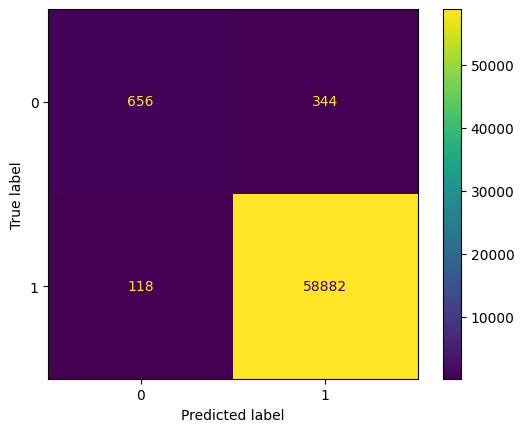

,Sensitividade,Especificidade,Acurácia
0,0.998,0.656,0.9923


In [ ]:
#Matriz de confusão para cutoff = 0.5
matriz_confusao(observado=df['classe_label'],
                predicts=df['phat'],
                cutoff=0.5)

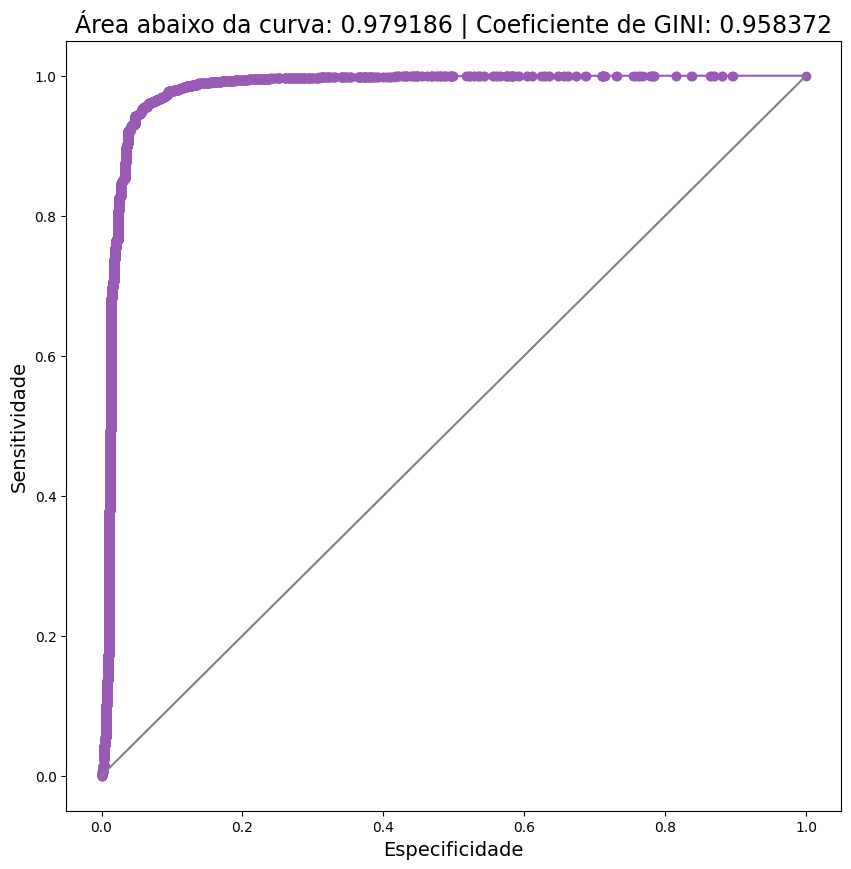

In [ ]:
# curva roc
fpr, tpr, thresholds =roc_curve(df['classe_label'],df['phat'])
roc_auc = auc(fpr, tpr)
gini = (roc_auc - 0.5)/(0.5)
plt.figure(figsize=(10,10))
plt.plot(fpr,tpr, '-o', color="#9b59b6")
plt.plot(fpr,fpr, color='gray')
plt.title("Área abaixo da curva: %f" % roc_auc +
          " | Coeficiente de GINI: %f" % gini, fontsize=17)
plt.xlabel("Especificidade", fontsize=14)
plt.ylabel("Sensitividade", fontsize=14)
plt.show()

# Utilizando os dados do ano presente para validação do modelo

In [ ]:
teste = pd.read_csv("air_system_present_year.csv", delimiter = ",")

In [ ]:
teste.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,2682,4736,3862,1846,0,0,0,3976,0,0,0,1520,2374,11516,9480,111258,470,0,0,0,0,58,26,0,0,0,0,0,0,0,0,13124,2,1956,434,76,174,190,6198,1148,2948,2,0,8762,2566,480,380,196,516,86,66,74,0,124340,4,6,4,0,3976,318,107662,3458,na,na,na,na,na,na,na,na,110980,59.53,124340,124340,184970,54,686,12246,123880,13196,1209600,598,0,6,0,5913.6,0,5851.2,6,30,0,2,5512,4674,1388,1508,38,4,0,0,8,12,124340,0,1550,14,36,26,920,430,7650,2294,206,0,22,42,5336,1276,0,0,0,0,6598,70,112,0,0,0,0,0,0,0,0,340,0,0,1100,574,232,66,780,882,0,4,0,0,0,465.5,90,7502,3156,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,0,748,12594,3636,0,0,0,5244,0,60,0,0,0,23174,18166,23686,1270,0,0,0,0,12,82,0,0,0,0,0,0,0,692,16286,0,280,44,50,1274,866,3362,11102,0,0,0,12564,1756,638,276,172,132,812,308,192,128,46894,4,2,38,0,5244,360,20520,3134,na,na,na,na,na,na,na,na,23320,81.89,46894,46894,48324,68,0,4486,46480,17050,1209600,726,2,4,0,7224.96,0,7768.32,0,42,0,0,4,7064,6200,2452,1246,12,0,0,14,54,46894,0,2202,28,114,350,700,1708,9622,2174,80,0,80,206,7802,1466,0,0,0,0,7918,78,40,0,0,0,0,0,0,0,0,352,0,0,3996,584,200,62,37580,3756,6368,36,0,0,0,2.86,102,10040,3310,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,199486,1358536,1952422,452706,25130,520,0,1891670,0,0,0,77898,110548,3605894,3291610,959756,286536,0,0,0,0,106,340,0,0,0,0,0,24286,681260,2808472,474782,0,22984,894,1162,1304,1856,388700,3424812,123828,23260,0,1662580,667960,387998,226078,161558,148288,154908,220820,147744,210866,4644422,958,7848,3624,0,1891670,47066,692800,265492,336240,194360,245240,na,na,na,na,na,175480,66002.89,4644422,4644422,4608738,22706,2272,95510,1006260,3991552,1209600,126310,0,104,0,3594885.12,0,374649.6,148,720,0,5154,174956,622312,1002504,793938,541734,345896,300806,201500,52,92,4644422,0,24818,964,162660,215004,217930,3038612,322718,6080,14,0,226,572,3593728,1911060,0,284,0,0,3613906,4218,692,0,0,0,0,0,0,0,0,25278,9438,2504,10262714,1278664,109700,19072,9520,4902,4434614,70900,0,0,26002880,2057.84,2158,396312,538136,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,0,123922,984314,1680050,1135268,92606,14038,1772828,0,0,0,1116,2372,3546760,3053176,652616,423374,0,0,7274,0,1622,432,0,0,0,0,0,6388,1091104,2930694,2012,0,3526,904,1426,223226,2663348,1137664,104,0,0,0,1283806,928212,345132,265930,194770,158262,219942,620264,13880,0,4201350,98,238,880,16,1772828,51468,331744,316130,176000,208420,159380,na,na,na,na,na,100120,59816.46,4201350,4201350,4203050,29967.0,26214,51894,562680,4030198,1209600,114684,0,144,0,3387773.76,38633.28,599624.64,0,0,0,0,14308,475410,1109740,1528024,837114,58942,6220,440,1278,1292,4201350,na,6846,810,70090,345884,191284,2454600,926846,33558,280,0,1516,1398,2050280,64066,0,674,0,46,3413978,2924,414,0,0,60,387

In [ ]:
df_teste = pd.DataFrame()

In [ ]:
for i in features_stepwise:
  df_teste[i] = teste[[i]]

In [ ]:
df_teste.head()

,aa_000,ab_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_007,ag_008,ag_009,ah_000,aj_000,ak_000,al_000,am_0,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_002,ba_003,ba_006,ba_007,ba_008,bc_000,bd_000,be_000,bf_000,bh_000,bj_000,bk_000,bl_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bz_000,ca_000,cb_000,cd_000,cg_000,ch_000,cj_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_004,cn_007,cn_008,cn_009,co_000,cp_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_007,cs_008,cs_009,ct_000,cu_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dn_000,do_000,dp_000,dt_000,dv_000,dx_000,dy_000,dz_000,ea_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_004,ee_005,ee_007,ee_008,ee_009,ef_000
0,60,0,12,0,0,0,0,0,2682,4736,3862,0,0,0,3976,0,0,1520,2374,9480,111258,470,0,0,0,0,58,26,0,0,0,0,0,0,0,0,13124,2,1956,174,190,6198,1148,2948,2,0,480,380,86,66,74,4,6,4,0,318,3458,na,na,na,na,na,na,na,110980,59.53,686,12246,123880,1209600,6,0,0,6,30,0,2,5512,1388,4,0,0,8,12,0,1550,14,36,26,920,2294,206,0,22,42,1276,0,0,0,0,6598,70,112,0,0,0,0,0,0,340,0,0,66,882,0,4,0,0,465.5,90,7502,3156,1098,412,654,88,0,0,0
1,82,0,40,0,0,0,0,0,0,748,12594,0,0,0,5244,60,0,0,0,18166,23686,1270,0,0,0,0,12,82,0,0,0,0,0,0,0,692,16286,0,280,1274,866,3362,11102,0,0,0,638,276,812,308,192,4,2,38,0,360,3134,na,na,na,na,na,na,na,23320,81.89,0,4486,46480,1209600,4,0,0,0,42,0,0,4,6200,12,0,0,14,54,0,2202,28,114,350,700,2174,80,0,80,206,1466,0,0,0,0,7918,78,40,0,0,0,0,0,0,352,0,0,62,3756,6368,36,0,0,2.86,102,10040,3310,1068,1620,116,462,0,0,0
2,66002,2,112,0,0,0,0,0,199486,1358536,1952422,25130,520,0,1891670,0,0,77898,110548,3291610,959756,286536,0,0,0,0,106,340,0,0,0,0,0,24286,681260,2808472,474782,0,22984,1304,1856,388700,3424812,123828,23260,0,387998,226078,154908,220820,147744,958,7848,3624,0,47066,265492,336240,194360,na,na,na,na,na,175480,66002.89,2272,95510,1006260,1209600,104,0,0,148,720,0,5154,174956,1002504,345896,300806,201500,52,92,0,24818,964,162660,215004,217930,6080,14,0,226,572,1911060,0,284,0,0,3613906,4218,692,0,0,0,0,0,0,25278,9438,2504,19072,4902,4434614,70900,0,0,2057.84,2158,396312,538136,495076,440134,269556,153680,516,0,0
3,59816,na,936,0,0,0,0,0,0,123922,984314,1135268,92606,14038,1772828,0,0,1116,2372,3053176,652616,423374,0,0,7274,0,1622,432,0,0,0,0,0,6388,1091104,2930694,2012,0,3526,223226,2663348,1137664,104,0,0,0,345132,265930,219942,620264,13880,98,238,880,16,51468,316130,176000,208420,na,na,na,na,na,100120,59816.46,26214,51894,562680,1209600,144,0,38633.28,0,0,0,0,14308,1109740,58942,6220,440,1278,1292,na,6846,810,70090,345884,191284,33558,280,0,1516,1398,64066,0,674,0,46,3413978,2924,414,0,60,38710,0,0,0,27740,33354,6330,21290,435370,0,0,0,0,1541.32,1678,659550,691580,540820,483302,485332,210074,281662,3232,0
4,1814,na,140,0,0,0,0,0,0,72,17926,3114,0,0,48978,0,0,0,0,89920,12932,5092,0,0,0,0,102,50,0,0,0,0,0,11544,73570,3662,15170,0,126,58,10768,92898,2,0,0,0,9824,4552,192,142,0,4,4,986,0,1100,4966,na,na,na,na,na,na,na,12700,1813.74,330,10874,109880,1209600,8,0,0,0,0,0,0,0,77394,230,28,0,2,10,na,144,14,86,5532,1792,1986,92,0,230,178,57312,44,4,0,0,95372,78,36,0,0,0,0,0,0,538,360,142,344,394,13664,110,0,0,113.86,52,10216,9958,7646,18466,49782,482,76,0,0


# Arrumando formatação e tratando dados NaN

In [ ]:
df_teste = df_teste.iloc[:, 0:129].replace('na',np.nan).astype(float)

In [ ]:
df_teste.insert(0, "class", teste["class"].astype("category"))

In [ ]:
df_teste.rename(columns={'class': 'classe'}, inplace = True)

In [ ]:
df_teste.head()

,classe,aa_000,ab_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_007,ag_008,ag_009,ah_000,aj_000,ak_000,al_000,am_0,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_002,ba_003,ba_006,ba_007,ba_008,bc_000,bd_000,be_000,bf_000,bh_000,bj_000,bk_000,bl_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bz_000,ca_000,cb_000,cd_000,cg_000,ch_000,cj_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_004,cn_007,cn_008,cn_009,co_000,cp_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_007,cs_008,cs_009,ct_000,cu_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dn_000,do_000,dp_000,dt_000,dv_000,dx_000,dy_000,dz_000,ea_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_004,ee_005,ee_007,ee_008,ee_009,ef_000
0,neg,60.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,2682.0,4736.0,3862.0,0.0,0.0,0.0,3976.0,0.0,0.0,1520.0,2374.0,9480.0,111258.0,470.0,0.0,0.0,0.0,0.0,58.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13124.0,2.0,1956.0,174.0,190.0,6198.0,1148.0,2948.0,2.0,0.0,480.0,380.0,86.0,66.0,74.0,4.0,6.0,4.0,0.0,318.0,3458.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110980.0,59.53,686.0,12246.0,123880.0,1209600.0,6.0,0.0,0.00,6.0,30.0,0.0,2.0,5512.0,1388.0,4.0,0.0,0.0,8.0,12.0,0.0,1550.0,14.0,36.0,26.0,920.0,2294.0,206.0,0.0,22.0,42.0,1276.0,0.0,0.0,0.0,0.0,6598.0,70.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,340.0,0.0,0.0,66.0,882.0,0.0,4.0,0.0,0.0,465.50,90.0,7502.0,3156.0,1098.0,412.0,654.0,88.0,0.0,0.0,0.0
1,neg,82.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,748.0,12594.0,0.0,0.0,0.0,5244.0,60.0,0.0,0.0,0.0,18166.0,23686.0,1270.0,0.0,0.0,0.0,0.0,12.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,692.0,16286.0,0.0,280.0,1274.0,866.0,3362.0,11102.0,0.0,0.0,0.0,638.0,276.0,812.0,308.0,192.0,4.0,2.0,38.0,0.0,360.0,3134.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23320.0,81.89,0.0,4486.0,46480.0,1209600.0,4.0,0.0,0.00,0.0,42.0,0.0,0.0,4.0,6200.0,12.0,0.0,0.0,14.0,54.0,0.0,2202.0,28.0,114.0,350.0,700.0,2174.0,80.0,0.0,80.0,206.0,1466.0,0.0,0.0,0.0,0.0,7918.0,78.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,352.0,0.0,0.0,62.0,3756.0,6368.0,36.0,0.0,0.0,2.86,102.0,10040.0,3310.0,1068.0,1620.0,116.0,462.0,0.0,0.0,0.0
2,neg,66002.0,2.0,112.0,0.0,0.0,0.0,0.0,0.0,199486.0,1358536.0,1952422.0,25130.0,520.0,0.0,1891670.0,0.0,0.0,77898.0,110548.0,3291610.0,959756.0,286536.0,0.0,0.0,0.0,0.0,106.0,340.0,0.0,0.0,0.0,0.0,0.0,24286.0,681260.0,2808472.0,474782.0,0.0,22984.0,1304.0,1856.0,388700.0,3424812.0,123828.0,23260.0,0.0,387998.0,226078.0,154908.0,220820.0,147744.0,958.0,7848.0,3624.0,0.0,47066.0,265492.0,336240.0,194360.0,NaN,NaN,NaN,NaN,NaN,175480.0,66002.89,2272.0,95510.0,1006260.0,1209600.0,104.0,0.0,0.00,148.0,720.0,0.0,5154.0,174956.0,1002504.0,345896.0,300806.0,201500.0,52.0,92.0,0.0,24818.0,964.0,162660.0,215004.0,217930.0,6080.0,14.0,0.0,226.0,572.0,1911060.0,0.0,284.0,0.0,0.0,3613906.0,4218.0,692.0,0.0,0.0,0.0,0.0,0.0,0.0,25278.0,9438.0,2504.0,19072.0,4902.0,4434614.0,70900.0,0.0,0.0,2057.84,2158.0,396312.0,538136.0,495076.0,440134.0,269556.0,153680.0,516.0,0.0,0.0
3,neg,59816.0,NaN,936.0,0.0,0.0,0.0,0.0,0.0,0.0,123922.0,984314.0,1135268.0,92606.0,14038.0,1772828.0,0.0,0.0,1116.0,2372.0,3053176.0,652616.0,423374.0,0.0,0.0,7274.0,0.0,1622.0,432.0,0.0,0.0,0.0,0.0,0.0,6388.0,1091104.0,2930694.0,2012.0,0.0,3526.0,223226.0,2663348.0,1137664.0,104.0,0.0,0.0,0.0,345132.0,265930.0,219942.0,620264.0,13880.0,98.0,238.0,880.0,16.0,51468.0,316130.0,176000.0,208420.0,NaN,NaN,NaN,NaN,NaN,100120.0,59816.46,26214.0,51894.0,562680.0,1209600.0,144.0,0.0,38633.28,0.0,0.0,0.0,0.0,14308.0,1109740.0,58942.0,6220.0,440.0,1278.0,1292.0,NaN,6846.0,810.0,70090.0,345884.0,191284.0,33558.0,280.0,0.0,1516.0,1398.0,64066.0,0.0,674.0,0.0,46.0,3413978.0,2924.0,414.0,0.0,60.0,38710.0,0.0,0.0,0.0,27740.0,33354.0,6330.0,21290.0,435370.0,0.0,0.0,0.0,0.0,1541.32,1678.0,659550.0,691580.0,540820.0,483302.0,485332.0,210074.0,281662.0,3232.0,0.0
4,neg,1814.0,NaN,140.0,0.0,0.0,0.0,

In [ ]:
df_teste["classe"].value_counts()

classe
neg    15625
pos      375
Name: count, dtype: int64

In [ ]:
df_teste.isnull().sum()

classe        0
aa_000        0
ab_000    12363
ad_000     3981
ae_000      690
          ...  
ee_005      192
ee_007      192
ee_008      192
ee_009      192
ef_000      762
Length: 130, dtype: int64

In [ ]:
imputer = SimpleImputer(strategy= "mean")
for col in df_teste.iloc[:, 1:130]:
    imputer.fit(df_teste[[col]])
    df_teste[col] = imputer.transform(df_teste[[col]])

In [ ]:
df.isnull().sum()

classe          0
aa_000          0
ab_000          0
ac_000          0
ad_000          0
               ..
ee_008          0
ee_009          0
ef_000          0
classe_label    0
phat            0
Length: 172, dtype: int64

In [ ]:
df_teste.head()

,classe,aa_000,ab_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_007,ag_008,ag_009,ah_000,aj_000,ak_000,al_000,am_0,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_002,ba_003,ba_006,ba_007,ba_008,bc_000,bd_000,be_000,bf_000,bh_000,bj_000,bk_000,bl_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bz_000,ca_000,cb_000,cd_000,cg_000,ch_000,cj_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_004,cn_007,cn_008,cn_009,co_000,cp_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_007,cs_008,cs_009,ct_000,cu_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dn_000,do_000,dp_000,dt_000,dv_000,dx_000,dy_000,dz_000,ea_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_004,ee_005,ee_007,ee_008,ee_009,ef_000,classe_label
0,neg,60.0,0.000000,12.0,0.0,0.0,0.0,0.0,0.0,2682.0,4736.0,3862.0,0.0,0.0,0.0,3976.0,0.0,0.0,1520.0,2374.0,9480.0,111258.0,470.0,0.0,0.0,0.0,0.0,58.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13124.0,2.0,1956.0,174.0,190.0,6198.0,1148.0,2948.0,2.0,0.0,480.0,380.0,86.0,66.0,74.0,4.0,6.0,4.0,0.0,318.0,3458.0,280200.504745,320483.011169,457347.105202,503282.157837,538685.709058,567845.94899,587884.465343,110980.0,59.53,686.0,12246.0,123880.0,1209600.0,6.0,0.0,0.00,6.0,30.0,0.0,2.0,5512.0,1388.0,4.0,0.0,0.0,8.0,12.0,0.000000,1550.0,14.0,36.0,26.0,920.0,2294.0,206.0,0.0,22.0,42.0,1276.0,0.0,0.0,0.0,0.0,6598.0,70.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,340.0,0.0,0.0,66.0,882.0,0.0,4.0,0.0,0.0,465.50,90.0,7502.0,3156.0,1098.0,412.0,654.0,88.0,0.0,0.0,0.0,1.0
1,neg,82.0,0.000000,40.0,0.0,0.0,0.0,0.0,0.0,0.0,748.0,12594.0,0.0,0.0,0.0,5244.0,60.0,0.0,0.0,0.0,18166.0,23686.0,1270.0,0.0,0.0,0.0,0.0,12.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,692.0,16286.0,0.0,280.0,1274.0,866.0,3362.0,11102.0,0.0,0.0,0.0,638.0,276.0,812.0,308.0,192.0,4.0,2.0,38.0,0.0,360.0,3134.0,280200.504745,320483.011169,457347.105202,503282.157837,538685.709058,567845.94899,587884.465343,23320.0,81.89,0.0,4486.0,46480.0,1209600.0,4.0,0.0,0.00,0.0,42.0,0.0,0.0,4.0,6200.0,12.0,0.0,0.0,14.0,54.0,0.000000,2202.0,28.0,114.0,350.0,700.0,2174.0,80.0,0.0,80.0,206.0,1466.0,0.0,0.0,0.0,0.0,7918.0,78.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,352.0,0.0,0.0,62.0,3756.0,6368.0,36.0,0.0,0.0,2.86,102.0,10040.0,3310.0,1068.0,1620.0,116.0,462.0,0.0,0.0,0.0,1.0
2,neg,66002.0,2.000000,112.0,0.0,0.0,0.0,0.0,0.0,199486.0,1358536.0,1952422.0,25130.0,520.0,0.0,1891670.0,0.0,0.0,77898.0,110548.0,3291610.0,959756.0,286536.0,0.0,0.0,0.0,0.0,106.0,340.0,0.0,0.0,0.0,0.0,0.0,24286.0,681260.0,2808472.0,474782.0,0.0,22984.0,1304.0,1856.0,388700.0,3424812.0,123828.0,23260.0,0.0,387998.0,226078.0,154908.0,220820.0,147744.0,958.0,7848.0,3624.0,0.0,47066.0,265492.0,336240.000000,194360.000000,457347.105202,503282.157837,538685.709058,567845.94899,587884.465343,175480.0,66002.89,2272.0,95510.0,1006260.0,1209600.0,104.0,0.0,0.00,148.0,720.0,0.0,5154.0,174956.0,1002504.0,345896.0,300806.0,201500.0,52.0,92.0,0.000000,24818.0,964.0,162660.0,215004.0,217930.0,6080.0,14.0,0.0,226.0,572.0,1911060.0,0.0,284.0,0.0,0.0,3613906.0,4218.0,692.0,0.0,0.0,0.0,0.0,0.0,0.0,25278.0,9438.0,2504.0,19072.0,4902.0,4434614.0,70900.0,0.0,0.0,2057.84,2158.0,396312.0,538136.0,495076.0,440134.0,269556.0,153680.0,516.0,0.0,0.0,1.0
3,neg,59816.0,0.772065,936.0,0.0,0.0,0.0,0.0,0.0,0.0,123922.0,984314.0,1135268.0,92606.0,14038.0,1772828.0,0.0,0.0,1116.0,2372.0,3053176.0,652616.0,423374.0,0.0,0.0,7274.0,0.0,1622.0,432.0,0.0,0.0,0.0,0.0,0.0,6388.0,1091104.0,2930694.0,2012.0,0.0,3526.0,223226.0,2663348.0,1137664.0,104.0,0.0,0.0,0.0,345132.0,265930.0,219942.0,620264.0,13880.0,98.0,238.0,880.0,16.0,51468.0,316130.0,176000.000000,208420.000000,457347.105202,503282.157837,538685.709058,567845.94899,587884.465343,100120.0,59816.46,26214.0,51894.0,562680.0,1209600.0,144.0,0.0,38633.28,0.0,0.0,0.0,0.0,14308.0,1109740.0,58942.0,6220.0,440.0,1278.0,1292.0,50.023096,6846.0,8

In [ ]:
df_teste.loc[df_teste['classe']== "neg",
       'classe_label'] = 1
df_teste.loc[df_teste['classe']== "pos",
       'classe_label'] = 0

# Fazendo a predição da base de teste com o modelo treinado

In [ ]:
df_teste['phat'] = modelo.predict(df_teste)

In [ ]:
df_teste.head()

,classe,aa_000,ab_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_007,ag_008,ag_009,ah_000,aj_000,ak_000,al_000,am_0,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_002,ba_003,ba_006,ba_007,ba_008,bc_000,bd_000,be_000,bf_000,bh_000,bj_000,bk_000,bl_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bz_000,ca_000,cb_000,cd_000,cg_000,ch_000,cj_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_004,cn_007,cn_008,cn_009,co_000,cp_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_007,cs_008,cs_009,ct_000,cu_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dn_000,do_000,dp_000,dt_000,dv_000,dx_000,dy_000,dz_000,ea_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_004,ee_005,ee_007,ee_008,ee_009,ef_000,classe_label,phat
0,neg,60.0,0.000000,12.0,0.0,0.0,0.0,0.0,0.0,2682.0,4736.0,3862.0,0.0,0.0,0.0,3976.0,0.0,0.0,1520.0,2374.0,9480.0,111258.0,470.0,0.0,0.0,0.0,0.0,58.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13124.0,2.0,1956.0,174.0,190.0,6198.0,1148.0,2948.0,2.0,0.0,480.0,380.0,86.0,66.0,74.0,4.0,6.0,4.0,0.0,318.0,3458.0,280200.504745,320483.011169,457347.105202,503282.157837,538685.709058,567845.94899,587884.465343,110980.0,59.53,686.0,12246.0,123880.0,1209600.0,6.0,0.0,0.00,6.0,30.0,0.0,2.0,5512.0,1388.0,4.0,0.0,0.0,8.0,12.0,0.000000,1550.0,14.0,36.0,26.0,920.0,2294.0,206.0,0.0,22.0,42.0,1276.0,0.0,0.0,0.0,0.0,6598.0,70.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,340.0,0.0,0.0,66.0,882.0,0.0,4.0,0.0,0.0,465.50,90.0,7502.0,3156.0,1098.0,412.0,654.0,88.0,0.0,0.0,0.0,1.0,0.997968
1,neg,82.0,0.000000,40.0,0.0,0.0,0.0,0.0,0.0,0.0,748.0,12594.0,0.0,0.0,0.0,5244.0,60.0,0.0,0.0,0.0,18166.0,23686.0,1270.0,0.0,0.0,0.0,0.0,12.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,692.0,16286.0,0.0,280.0,1274.0,866.0,3362.0,11102.0,0.0,0.0,0.0,638.0,276.0,812.0,308.0,192.0,4.0,2.0,38.0,0.0,360.0,3134.0,280200.504745,320483.011169,457347.105202,503282.157837,538685.709058,567845.94899,587884.465343,23320.0,81.89,0.0,4486.0,46480.0,1209600.0,4.0,0.0,0.00,0.0,42.0,0.0,0.0,4.0,6200.0,12.0,0.0,0.0,14.0,54.0,0.000000,2202.0,28.0,114.0,350.0,700.0,2174.0,80.0,0.0,80.0,206.0,1466.0,0.0,0.0,0.0,0.0,7918.0,78.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,352.0,0.0,0.0,62.0,3756.0,6368.0,36.0,0.0,0.0,2.86,102.0,10040.0,3310.0,1068.0,1620.0,116.0,462.0,0.0,0.0,0.0,1.0,0.998699
2,neg,66002.0,2.000000,112.0,0.0,0.0,0.0,0.0,0.0,199486.0,1358536.0,1952422.0,25130.0,520.0,0.0,1891670.0,0.0,0.0,77898.0,110548.0,3291610.0,959756.0,286536.0,0.0,0.0,0.0,0.0,106.0,340.0,0.0,0.0,0.0,0.0,0.0,24286.0,681260.0,2808472.0,474782.0,0.0,22984.0,1304.0,1856.0,388700.0,3424812.0,123828.0,23260.0,0.0,387998.0,226078.0,154908.0,220820.0,147744.0,958.0,7848.0,3624.0,0.0,47066.0,265492.0,336240.000000,194360.000000,457347.105202,503282.157837,538685.709058,567845.94899,587884.465343,175480.0,66002.89,2272.0,95510.0,1006260.0,1209600.0,104.0,0.0,0.00,148.0,720.0,0.0,5154.0,174956.0,1002504.0,345896.0,300806.0,201500.0,52.0,92.0,0.000000,24818.0,964.0,162660.0,215004.0,217930.0,6080.0,14.0,0.0,226.0,572.0,1911060.0,0.0,284.0,0.0,0.0,3613906.0,4218.0,692.0,0.0,0.0,0.0,0.0,0.0,0.0,25278.0,9438.0,2504.0,19072.0,4902.0,4434614.0,70900.0,0.0,0.0,2057.84,2158.0,396312.0,538136.0,495076.0,440134.0,269556.0,153680.0,516.0,0.0,0.0,1.0,0.999158
3,neg,59816.0,0.772065,936.0,0.0,0.0,0.0,0.0,0.0,0.0,123922.0,984314.0,1135268.0,92606.0,14038.0,1772828.0,0.0,0.0,1116.0,2372.0,3053176.0,652616.0,423374.0,0.0,0.0,7274.0,0.0,1622.0,432.0,0.0,0.0,0.0,0.0,0.0,6388.0,1091104.0,2930694.0,2012.0,0.0,3526.0,223226.0,2663348.0,1137664.0,104.0,0.0,0.0,0.0,345132.0,265930.0,219942.0,620264.0,13880.0,98.0,238.0,880.0,16.0,51468.0,316130.0,176000.000000,208420.000000,457347.105202,503282.157837,538685.709058,567845.94899,587884.465343,100120.0,59816.46,26214.0,51894.0,562680.0,1209600.0,144.0,0.0,38633.28,0.0,0.0,0.0,0.0,14308.0,1109740.0,58942.0,6220.0,440.0,

# Matriz de confusão e curva ROC

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,\
    ConfusionMatrixDisplay, recall_score

def matriz_confusao(observado,predicts,cutoff):

    values = predicts.values

    predicao_binaria = []

    for item in values:
        if item >= cutoff:
            predicao_binaria.append(1)
        else:
            predicao_binaria.append(0)

    cm = confusion_matrix(observado, predicao_binaria)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

    sensitividade = recall_score(observado, predicao_binaria, pos_label=1)
    especificidadee = recall_score(observado, predicao_binaria, pos_label=0)
    acuracia = accuracy_score(observado, predicao_binaria)


    indicadores = pd.DataFrame({'Sensitividade':[sensitividade],
                                'Especificidade':[especificidadee],
                                'Acurácia':[acuracia]})
    return indicadores

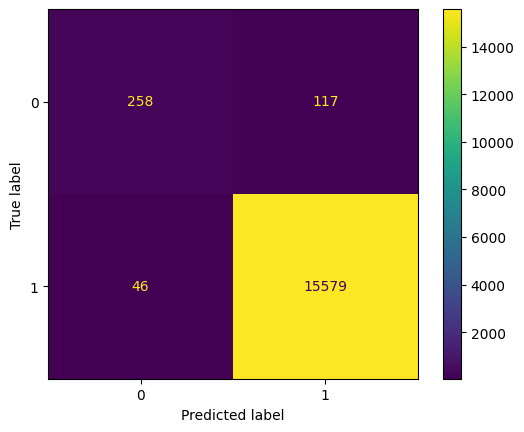

,Sensitividade,Especificidade,Acurácia
0,0.997056,0.688,0.989812


In [ ]:
#Matriz de confusão para cutoff = 0.5
matriz_confusao(observado=df_teste['classe_label'],
                predicts=df_teste['phat'],
                cutoff=0.5)

# Dado a particularidade do problema onde o evento acontece poucas vezes em relação ao numero de observações, podemos aumentar o cutoff a fim de reduzir o erro que custa mais a empresa que é os caminhões que deram o problema e nao foi enviado a oficina

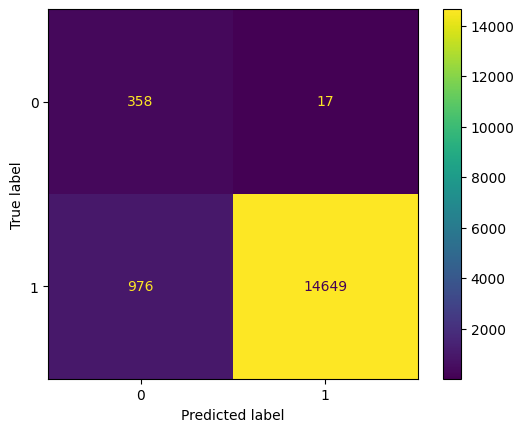

,Sensitividade,Especificidade,Acurácia
0,0.937536,0.954667,0.937937


In [ ]:
#Matriz de confusão para cutoff = 0.99
matriz_confusao(observado=df_teste['classe_label'],
                predicts=df_teste['phat'],
                cutoff=0.99)

# Aumentando o cutoff para 0.99 observamos uma queda na acurácia e sensitividade, contudo é observado um aumento expressivo
# na especificidade saindo de 68,8% para 95,46%
# e isso fez com que o numero de erros de falso negativo (mais custoso) reduzisse significativamente

In [ ]:
fpr, tpr, thresholds =roc_curve(df_teste['classe_label'],df_teste['phat'])
roc_auc = auc(fpr, tpr)

In [ ]:
gini = (roc_auc - 0.5)/(0.5)

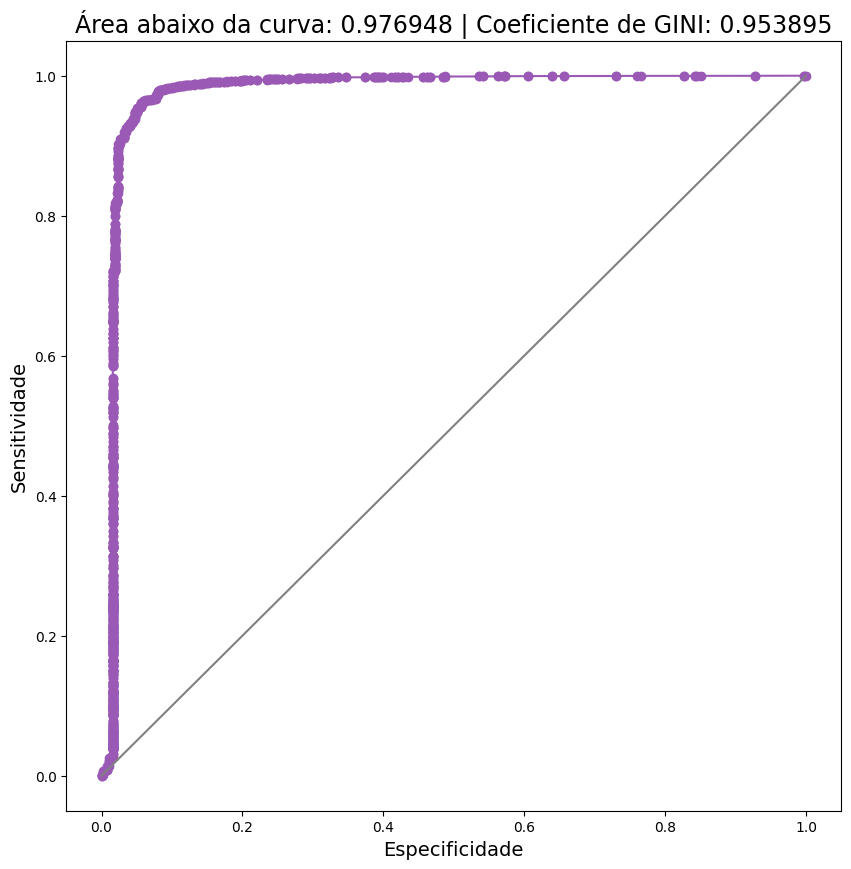

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(fpr,tpr, '-o', color="#9b59b6")
plt.plot(fpr,fpr, color='gray')
plt.title("Área abaixo da curva: %f" % roc_auc +
          " | Coeficiente de GINI: %f" % gini, fontsize=17)
plt.xlabel("Especificidade", fontsize=14)
plt.ylabel("Sensitividade", fontsize=14)
plt.show()

# O modelo final apresentou uma área da curva roc de 97,6% o que é um ótimo resultado

# Abaixo segue valor que a empresa economizaria se tivesse utilizado o modelo no ano de 2022

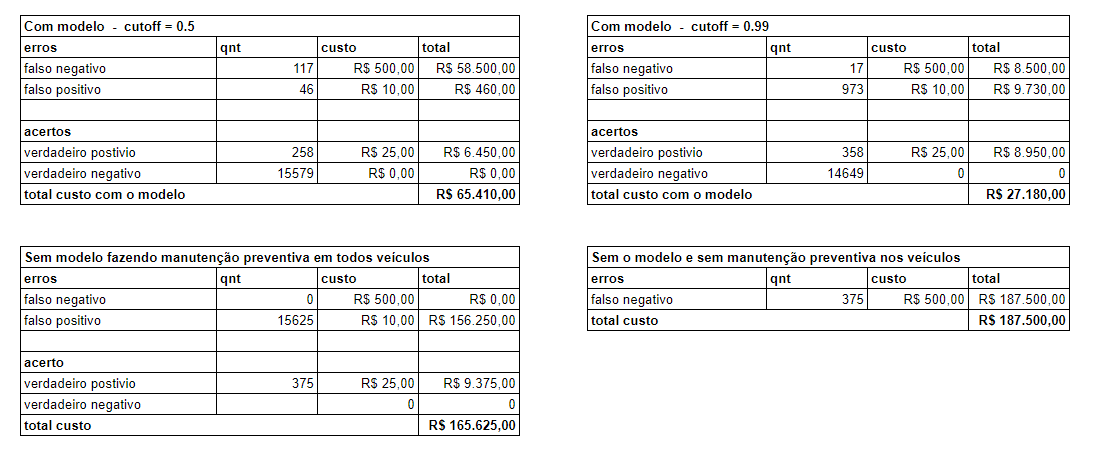